In [1]:
#pip install tensorflow

In [2]:
import gzip
import numpy as np
from tensorflow.keras.utils import to_categorical
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D

In [3]:
def open_images(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=16)\
            .reshape(-1, 28, 28)\
            .astype(np.float32)

In [4]:
def open_labels(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8 , offset=8)

In [5]:
X_train = open_images("data/mnist/train-images-idx3-ubyte.gz")
Y_train = open_labels("data/mnist/train-labels-idx1-ubyte.gz")

In [6]:
X_test = open_images("data/mnist/t10k-images-idx3-ubyte.gz")
Y_test = open_labels("data/mnist/t10k-labels-idx1-ubyte.gz")

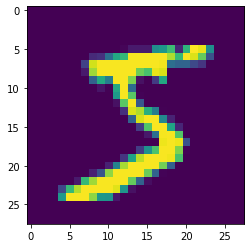

In [7]:
plt.imshow(X_train[0])
plt.show()

#### Zahlenbereich normieren

In [8]:
X_train = X_train / 255.
X_test = X_test / 255.

#### Model trainieren

In [9]:
model = Sequential()
model.add(Conv2D(1, kernel_size=(3,3), padding="same", input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2))) # bild um Faktor 2 verkleinern

model.add(UpSampling2D(size=(2,2))) # bild um Faktor 2 vergrößern
model.add(Conv2D(1, kernel_size=(3,3), padding="same", activation="sigmoid"))

In [10]:
model.compile(optimizer="rmsprop", loss="mse")

In [11]:
model.fit(X_train.reshape(-1, 28,28,1), X_train.reshape(-1, 28,28,1), epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0366
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0077
Epoch 3/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0077
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0077
Epoch 5/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0077
Epoch 6/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0077
Epoch 7/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0077
Epoch 8/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0077
Epoch 9/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0077
Epoch 10/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0077


In [12]:
image = X_train[0]
image_predicted = model.predict(image.reshape(-1, 28, 28, 1))
image_predicted.shape

(1, 28, 28, 1)

#### Reshape and show prediction

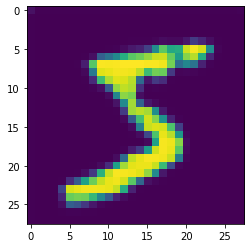

In [13]:
plt.imshow(image_predicted.reshape(28,28))
plt.show()

## Decoder & Encoder

In [17]:
encoder = Sequential()
encoder.add(Conv2D(1, kernel_size=(3, 3), padding="same", activation="relu", input_shape=(28, 28, 1)))
encoder.add(MaxPooling2D(pool_size=(2, 2)))
encoder.add(Conv2D(2, kernel_size=(3, 3), padding="same", activation="relu"))
encoder.add(MaxPooling2D(pool_size=(2, 2)))

decoder = Sequential()
decoder.add(Conv2D(2, kernel_size=(3, 3), padding="same", activation="relu", input_shape=(7, 7, 2)))
decoder.add(UpSampling2D(size=(2, 2)))
decoder.add(Conv2D(4, kernel_size=(3, 3), padding="same", activation="relu"))
decoder.add(UpSampling2D(size=(2, 2)))
decoder.add(Conv2D(1, kernel_size=(3, 3), padding="same", activation="sigmoid"))

model = Sequential()
model.add(encoder)
model.add(decoder)

In [18]:
model.compile(optimizer="rmsprop", loss="mse")

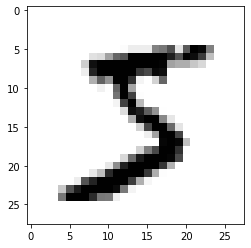

In [19]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap="gray_r")
plt.show()

## Desoising

#### Bildrauschen hinzufügen

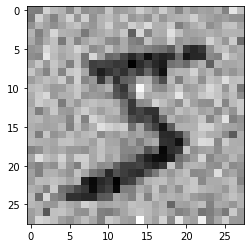

In [20]:
plt.imshow(X_train[0] + np.random.normal(0, 0.2, (28, 28)), cmap="gray_r")

In [21]:
X_train.shape

(60000, 28, 28)

In [22]:
Z_train = X_train + np.random.normal(0, 0.2, (60000, 28, 28))

Z_test = X_test + np.random.normal(0, 0.2, (10000, 28, 28))

In [23]:
model.fit(Z_train.reshape(-1, 28, 28, 1), X_train.reshape(-1, 28, 28, 1), epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0495
Epoch 2/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0309
Epoch 3/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0278
Epoch 4/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0258
Epoch 5/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0243
Epoch 6/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0235
Epoch 7/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0231
Epoch 8/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0228
Epoch 9/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0224
Epoch 10/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0221


In [ ]:
Z_test_pred = model.predict(Z_test.reshape(-1, 28, 28, 1))

In [ ]:
plt.imshow(Z_test_pred[0].reshape(28, 28), cmap="gray_r")
plt.show()

In [ ]:
plt.imshow(Z_test[0].reshape(28, 28), cmap="gray_r")
plt.show()